# Practical Implementation of Object Detection models using PyTorch

🔥 In this Colab Notebook, we are going to use PyTorch to load in some pre-trained Faster R-CNN, Mask R-CNN and SSD Object Detection models and we are going to use some sample images to predict how pre-trained model is performing on our custom images from Internet

**✅ Note:**
* All these Pre-trained Object detection models can be found on [PyTorch Documentation -> Models and pre-trained weights](https://pytorch.org/vision/stable/models.html)  
* These models availble on PyTorch are trained on the COCO dataset having a lots of classes


### **We will Implement the following models from PyTorch**
* Faster R-CNN Resnet50 backbone FPN Version 2 Pre-trained model
* Faster R-CNN Mobilenet backbone Version 3 Pre-trained model
* Mask R-CNN Resnet50 Backbone FPN Version 2 Pre-trained model
* Key Points Detection: KeypointRCNN with ResNet50 backbone FPN model

In [1]:
# Import torch and torchvision
import torch
import torchvision

from torchvision.io.image import read_image
from torchvision.utils import draw_bounding_boxes

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Faster R-CNN Resnet50 backbone FPN Version 2

In [3]:
# Import Model and its weights
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights

# Weights of our pre-trained model
frc_resnet50_v2_weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
# Data Transformation Pipeline our pre-trained model uses
frc_resnet50_v2_transformations = frc_resnet50_v2_weights.transforms()

# Define Pre-trained Faster R-CNN model
frc_resnet50_v2_model = fasterrcnn_resnet50_fpn_v2(weights=frc_resnet50_v2_weights, box_score_threshold=0.9).to(device)
frc_resnet50_v2_model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

**Note:** Since our model counts in all bounding box predictions having an Score of 0.05 (which is less), hence we must set it to 0.9, so that it takes in only the BBoxes predictions that have score above 0.9

In [4]:
print(f'Region of Interest Pooling Score threshold (Before): {frc_resnet50_v2_model.roi_heads.score_thresh}')
frc_resnet50_v2_model.roi_heads.score_thresh = 0.85
print(f'Region of Interest Pooling Score threshold (After): {frc_resnet50_v2_model.roi_heads.score_thresh}')

Region of Interest Pooling Score threshold (Before): 0.05
Region of Interest Pooling Score threshold (After): 0.85


In [5]:
# Define a function to take in an image path and return the predictions and the labels for that specific image

def predict_frc_resnet50_v2_model(img_path: str):
  # Read image and convert into Tensors
  try:
    img = read_image(img_path)
  except RuntimeError:
    print('There is an error with the File path, Pls check to insure it\'s correct')
    return None

  # Preprocess Image - Data transformation pipline
  transformed_img = frc_resnet50_v2_transformations(img)

  # Addin Batch Dimension
  input_tensor = transformed_img.unsqueeze(dim=0).to(device)

  # Use the Pre-trained model to predict on img
  frc_resnet50_v2_model.eval()
  predictions = frc_resnet50_v2_model(input_tensor)
  print(predictions)

  labels = [frc_resnet50_v2_weights.meta["categories"][i] for i in predictions[0]["labels"].tolist()]
  box_predictions = predictions[0]['boxes']

  # Draw Image with bounding boxes
  box = draw_bounding_boxes(img,
                            boxes=box_predictions,
                            labels=labels,
                            colors="red",
                            width=4,
                            font_size=30)
  print(f'Labels Detected: {labels}')
  box = box.permute(1, 2, 0).detach().cpu().numpy()
  plt.imshow(box)

[{'boxes': tensor([[ 30.3928,  24.1647, 222.0512, 137.5922],
        [120.8869,  90.9829, 205.1973, 176.1061]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([52, 53], device='cuda:0'), 'scores': tensor([0.9969, 0.9790], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['banana', 'apple']


/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


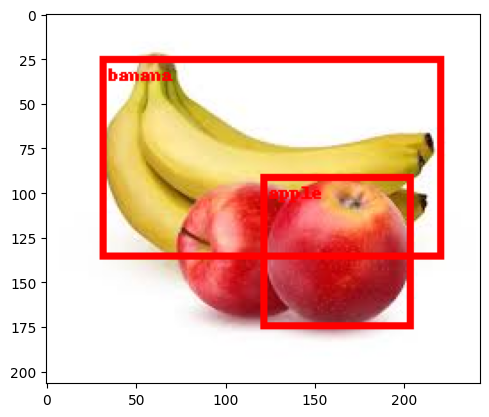

In [6]:
predict_frc_resnet50_v2_model('/content/banana_apple.jpeg')

[{'boxes': tensor([[  5.1876,  38.0878, 158.6089, 297.0355],
        [ 85.1598, 115.4751, 105.6297, 183.4197]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([ 1, 32], device='cuda:0'), 'scores': tensor([0.9982, 0.9911], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['person', 'tie']


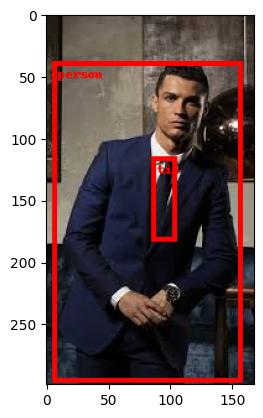

In [7]:
predict_frc_resnet50_v2_model('/content/ronaldo.jpeg')

[{'boxes': tensor([[141.6987,  28.2199, 277.0366, 157.2862],
        [  3.5658,  49.8164,  66.4001, 119.7038],
        [156.8772,  43.6377, 163.3205,  49.7078],
        [  2.9519,  49.7842,  20.3162, 103.2827],
        [138.2592,  17.0046, 150.3447,  35.2727],
        [151.8402,  19.7994, 165.2278,  34.3805]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([ 1,  1, 37,  1,  1,  1], device='cuda:0'), 'scores': tensor([0.9997, 0.9989, 0.9953, 0.9368, 0.8804, 0.8606], device='cuda:0',
       grad_fn=<IndexBackward0>)}]
Labels Detected: ['person', 'person', 'sports ball', 'person', 'person', 'person']


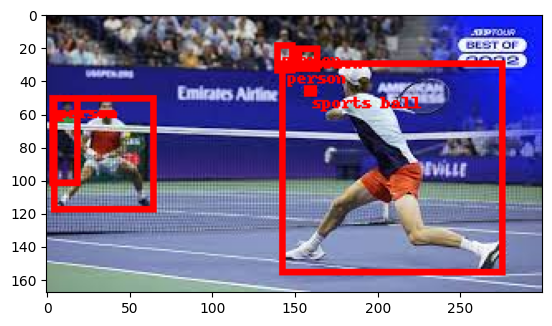

In [8]:
predict_frc_resnet50_v2_model('/content/tennis.jpeg')

[{'boxes': tensor([[ 19.2226,   5.6877, 124.3971, 137.0689],
        [ 62.3349, 106.7940,  89.5817, 136.1974]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([64, 86], device='cuda:0'), 'scores': tensor([0.9736, 0.8500], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['potted plant', 'vase']


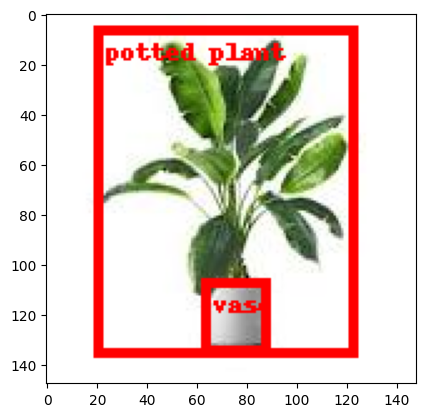

In [9]:
predict_frc_resnet50_v2_model('/content/potted_plant.jpeg')

[{'boxes': tensor([[ 840.8235,  342.5137, 2991.7981, 2201.5742],
        [ 206.4358, 2337.3535, 2543.9529, 3655.1467],
        [  33.8803, 2006.3068,  608.7892, 2436.9851],
        [   0.0000, 2108.5190, 3015.6882, 4032.0000],
        [1288.2225, 2076.9800, 1594.6282, 2291.4412],
        [ 214.0175,  980.2980,  674.4592, 1315.7125]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([ 1, 59, 51, 67, 50,  3], device='cuda:0'), 'scores': tensor([0.9995, 0.9946, 0.9911, 0.9870, 0.9571, 0.9258], device='cuda:0',
       grad_fn=<IndexBackward0>)}]
Labels Detected: ['person', 'pizza', 'bowl', 'dining table', 'spoon', 'car']


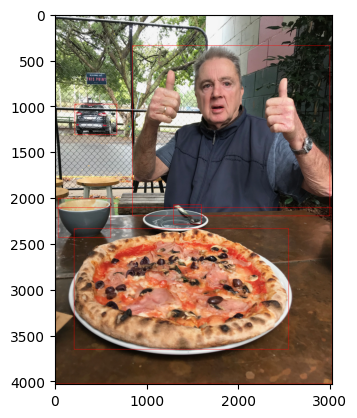

In [10]:
predict_frc_resnet50_v2_model('/content/04-pizza-dad.jpeg')

[{'boxes': tensor([[164.4306,  35.0505, 186.6135,  62.4906],
        [110.4893,  97.9181, 139.2501, 119.9332]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([13,  3], device='cuda:0'), 'scores': tensor([0.9987, 0.9903], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['stop sign', 'car']


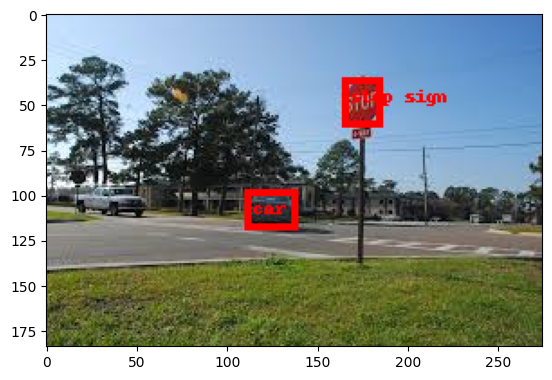

In [11]:
predict_frc_resnet50_v2_model('/content/stopsign.jpeg')

[{'boxes': tensor([[  0.0000, 108.5469, 113.8969, 155.2678],
        [ 38.4463, 166.5166,  95.7889, 191.8878]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([5, 8], device='cuda:0'), 'scores': tensor([0.9987, 0.9175], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['airplane', 'truck']


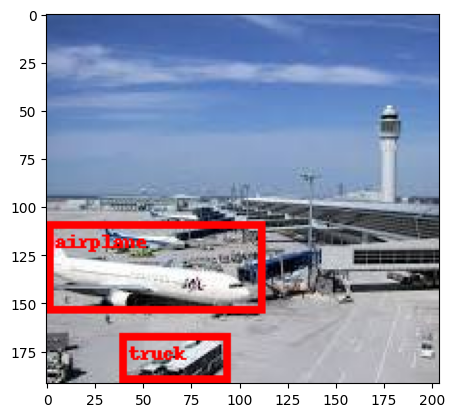

In [13]:
predict_frc_resnet50_v2_model('/content/airport.jpeg')

## Faster R-CNN Mobilenet backbone Version 3

This model has `Mobile-Net backbone` therefore can be used in mobiles and other small devices for Object detection as well!

In [14]:
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn, FasterRCNN_MobileNet_V3_Large_FPN_Weights

# Get DEFAULT=Best Weights for MobileNET model
frc_mobilenet_weights = FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT
# Weights (Pre-trained model) Data Transformation Pipeline
frc_mobilenet_transforms = frc_mobilenet_weights.transforms()

# MobileNET model
frc_mobilenet_model = fasterrcnn_mobilenet_v3_large_fpn(weights=frc_mobilenet_weights, box_score_thresh=0.9).to(device)
frc_mobilenet_model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block):

In [15]:
print(f'Region of Interest Pooling Score threshold (Before): {frc_mobilenet_model.roi_heads.score_thresh}')
frc_mobilenet_model.roi_heads.score_thresh = 0.9
print(f'Region of Interest Pooling Score threshold (After): {frc_mobilenet_model.roi_heads.score_thresh}')

Region of Interest Pooling Score threshold (Before): 0.9
Region of Interest Pooling Score threshold (After): 0.9


In [16]:
# Define a function to take in an image path and return the predictions and the labels for that specific image

def predict_frc_mobilenet_model(img_path: str):
  # Read image and convert into Tensors
  try:
    img = read_image(img_path)
  except RuntimeError:
    print('There is an error with the File path, Pls check to insure it\'s correct')
    return None

  # Preprocess Image - Data transformation pipline
  transformed_img = frc_mobilenet_transforms(img)

  # Addin Batch Dimension
  input_tensor = transformed_img.unsqueeze(dim=0).to(device)

  # Use the Pre-trained model to predict on img
  frc_mobilenet_model.eval()
  predictions = frc_mobilenet_model(input_tensor)
  print(predictions)

  labels = [frc_mobilenet_weights.meta["categories"][i] for i in predictions[0]["labels"].tolist()]
  box_predictions = predictions[0]['boxes']

  # Draw Image with bounding boxes
  box = draw_bounding_boxes(img,
                            boxes=box_predictions,
                            labels=labels,
                            colors="red",
                            width=4,
                            font_size=30)
  print(f'Labels Detected: {labels}')
  box = box.permute(1, 2, 0).detach().cpu().numpy()
  plt.imshow(box)

[{'boxes': tensor([[ 35.8704,  23.6005, 221.2588, 122.3920]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([52], device='cuda:0'), 'scores': tensor([0.9990], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['banana']


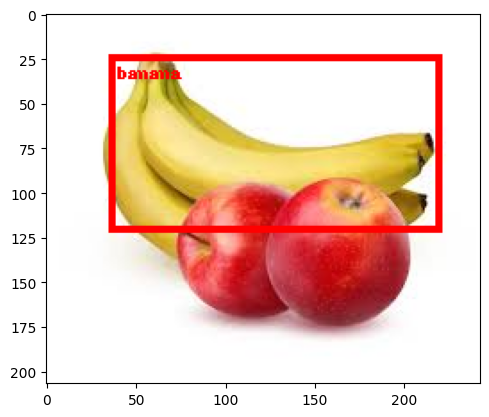

In [17]:
predict_frc_mobilenet_model(img_path="/content/banana_apple.jpeg")

[{'boxes': tensor([[ 19.1075,   6.6965, 122.8619, 135.7373],
        [ 61.6001, 105.9120,  90.5566, 135.8331]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([64, 86], device='cuda:0'), 'scores': tensor([0.9119, 0.9009], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['potted plant', 'vase']


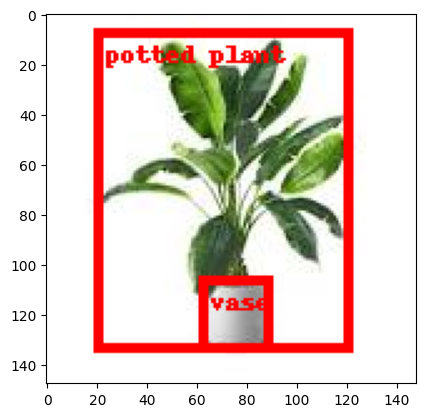

In [18]:
predict_frc_mobilenet_model(img_path="/content/potted_plant.jpeg")

[{'boxes': tensor([[  6.5452,  36.9435, 157.1425, 299.0000],
        [ 84.9886, 115.4885, 108.7238, 191.9183]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([ 1, 32], device='cuda:0'), 'scores': tensor([0.9997, 0.9631], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['person', 'tie']


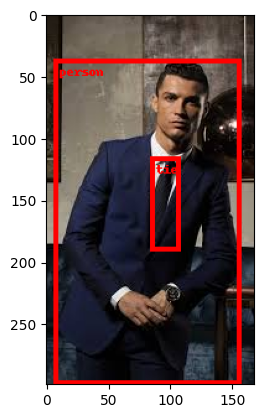

In [19]:
predict_frc_mobilenet_model(img_path="/content/ronaldo.jpeg")

[{'boxes': tensor([[142.8380,  37.7754, 275.1085, 154.9805],
        [138.0134,  12.1898, 153.1960,  32.4206],
        [  8.5138,  51.5582,  64.0348, 119.2136],
        [152.1983,  19.3392, 166.2158,  34.8346],
        [156.4814,  43.9161, 163.8497,  50.0142]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([ 1,  1,  1,  1, 37], device='cuda:0'), 'scores': tensor([0.9998, 0.9758, 0.9755, 0.9537, 0.9162], device='cuda:0',
       grad_fn=<IndexBackward0>)}]
Labels Detected: ['person', 'person', 'person', 'person', 'sports ball']


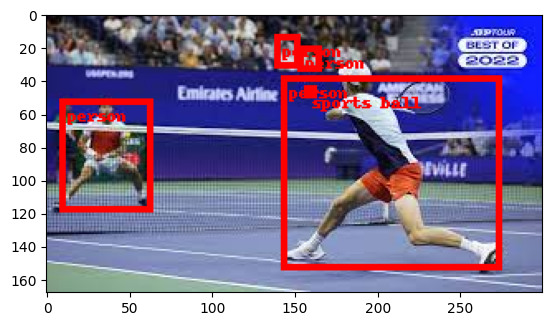

In [20]:
predict_frc_mobilenet_model(img_path="/content/tennis.jpeg")

[{'boxes': tensor([[ 880.4316,  391.7681, 2973.7788, 2206.2632],
        [ 213.5079, 2358.9380, 2521.8848, 3625.0613],
        [  27.7887, 2000.4155,  609.7152, 2441.6570],
        [  13.0363, 2017.4849, 2964.8882, 3861.9375],
        [ 213.0533, 1027.1841,  669.9349, 1319.8292]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([ 1, 59, 51, 67,  3], device='cuda:0'), 'scores': tensor([0.9984, 0.9977, 0.9966, 0.9684, 0.9368], device='cuda:0',
       grad_fn=<IndexBackward0>)}]
Labels Detected: ['person', 'pizza', 'bowl', 'dining table', 'car']


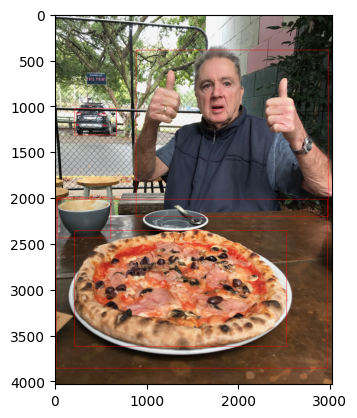

In [21]:
predict_frc_mobilenet_model(img_path="/content/04-pizza-dad.jpeg")

[{'boxes': tensor([[  0.2777, 111.5359, 111.1115, 155.7212],
        [ 26.6090, 107.3059,  73.2790, 122.9353],
        [101.6199, 122.6568, 140.9324, 145.2195]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([5, 5, 6], device='cuda:0'), 'scores': tensor([0.9974, 0.9637, 0.9259], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['airplane', 'airplane', 'bus']


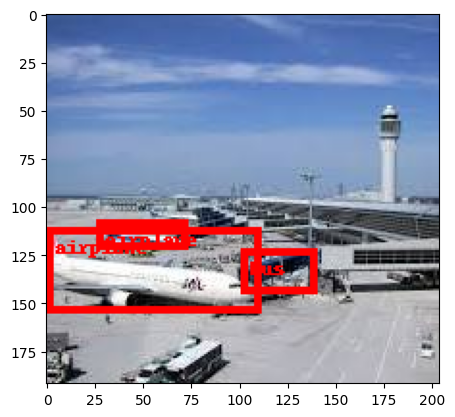

In [22]:
predict_frc_mobilenet_model(img_path="/content/airport.jpeg")

[{'boxes': tensor([[164.1743,  36.4631, 186.4708,  60.6256],
        [110.4462,  99.5250, 138.0062, 120.6430]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([13,  3], device='cuda:0'), 'scores': tensor([0.9994, 0.9156], device='cuda:0', grad_fn=<IndexBackward0>)}]
Labels Detected: ['stop sign', 'car']


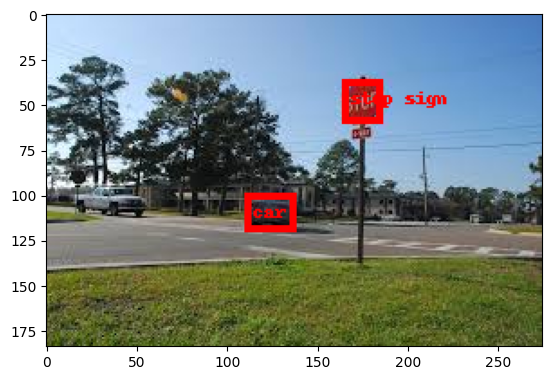

In [23]:
predict_frc_mobilenet_model(img_path="/content/stopsign.jpeg")

We can clearly see, that our First model - Faster RCNN Resnet50 V2 model and Faster RCNN MobileNet V2 model has performed wondeful

## Mask R-CNN Resnet50 Backbone FPN Version 2 Pre-trained model

In [24]:
# Import Mask R-CNN weights and model
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2, MaskRCNN_ResNet50_FPN_V2_Weights

# Load in best weights and Data Transformation Pipeline of those weights
mrc_weights = MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT
mrc_transforms = mrc_weights.transforms()

mrc_resnet_model = maskrcnn_resnet50_fpn_v2(weights=mrc_weights, box_score_thresh=0.9).to(device)
mrc_resnet_model

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [25]:
print(f'Region of Interest Pooling Score threshold: {mrc_resnet_model.roi_heads.score_thresh}')

Region of Interest Pooling Score threshold: 0.9


In [26]:
# Write a function that takes in Image path and returns an Plot of the image with Box and Label Predictions
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap with transparency
colors = [(0, 0, 0, 0), (0, 0, 255, 255)]
cmap = LinearSegmentedColormap.from_list("", colors)

def predict_maskrcnn_resnet_model(img_path: str, show_only_masks=False):
  # Read image and convert into Tensors
  try:
    img = read_image(img_path)
  except RuntimeError:
    print('There is an error with the File path, Pls check to insure it\'s correct')
    return None

  # Use Data Transformation Pipeline to transform image
  transformed_img = mrc_transforms(img)

  # Add Batch Dimension and convert to desired Device Type - GPU
  input_tensor = transformed_img.unsqueeze(dim=0).to(device)

  # Predict with Mask R-CNN model
  mrc_resnet_model.eval()
  predictions = mrc_resnet_model(input_tensor)[0]


  # Access Box predictions, labels, scores and masks
  labels = [mrc_weights.meta["categories"][i] for i in predictions["labels"].cpu().tolist()]
  box_predictions = predictions['boxes'].cpu()

  scores = predictions['scores'].cpu()
  masks = predictions['masks'].cpu()



  # Draw Image with bounding boxes
  box = draw_bounding_boxes(img,
                            boxes=box_predictions,
                            labels=labels,
                            colors="red",
                            width=4,
                            font_size=30)
  print(f'Labels Detected: {labels}')
  box = box.permute(1, 2, 0).detach().cpu().numpy()

  # Visualize Images with Pre-trained model predictions
  if not show_only_masks:
    plt.imshow(box, aspect="auto")

  # Plot each mask with the custom colormap and transparency
  if show_only_masks:
    for mask in masks:
      plt.imshow(mask.permute(1, 2, 0).detach().numpy(), cmap=cmap, alpha=0.5)

  # Adjust plot and display
  plt.axis("off")
  plt.tight_layout()
  plt.show()



Labels Detected: ['banana', 'apple', 'apple']


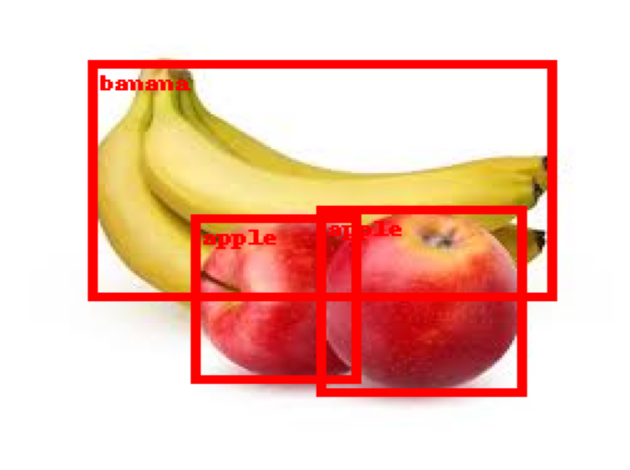

In [27]:
predict_maskrcnn_resnet_model(img_path='/content/banana_apple.jpeg')

Labels Detected: ['banana', 'apple', 'apple']


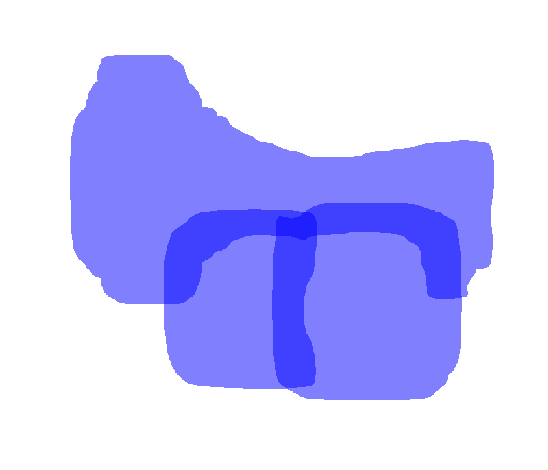

In [28]:
predict_maskrcnn_resnet_model(img_path='/content/banana_apple.jpeg', show_only_masks=True)

Labels Detected: ['person', 'tie']


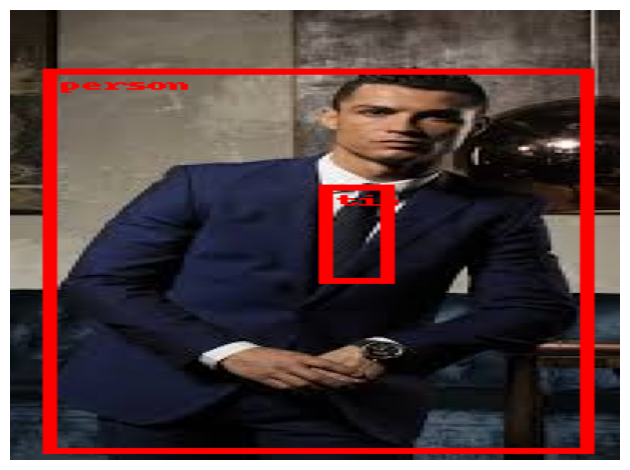

In [29]:
predict_maskrcnn_resnet_model(img_path='/content/ronaldo.jpeg', show_only_masks=False)

Labels Detected: ['person', 'tie']


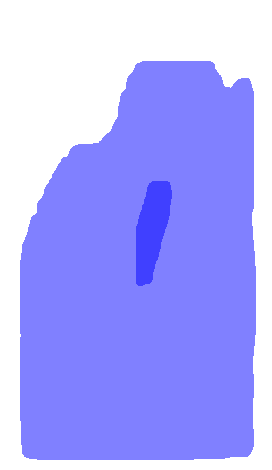

In [30]:
predict_maskrcnn_resnet_model(img_path='/content/ronaldo.jpeg', show_only_masks=True)

Labels Detected: ['potted plant']


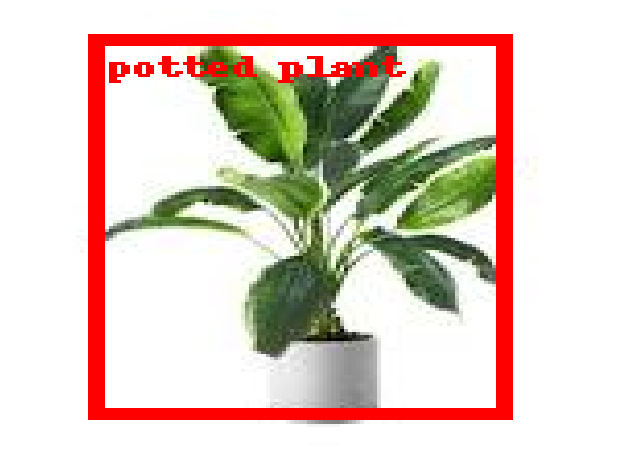

In [31]:
predict_maskrcnn_resnet_model(img_path='/content/potted_plant.jpeg', show_only_masks=False)

Labels Detected: ['potted plant']


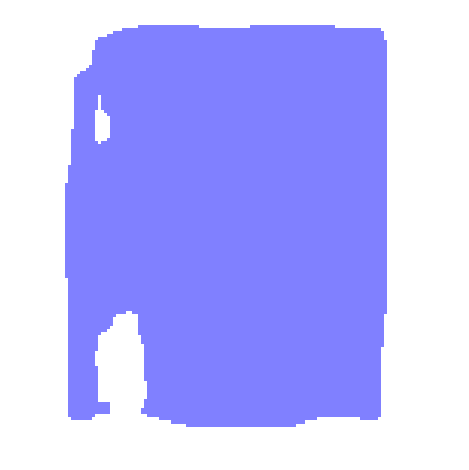

In [32]:
predict_maskrcnn_resnet_model(img_path='/content/potted_plant.jpeg', show_only_masks=True)

Labels Detected: ['person', 'person', 'sports ball', 'person', 'person']


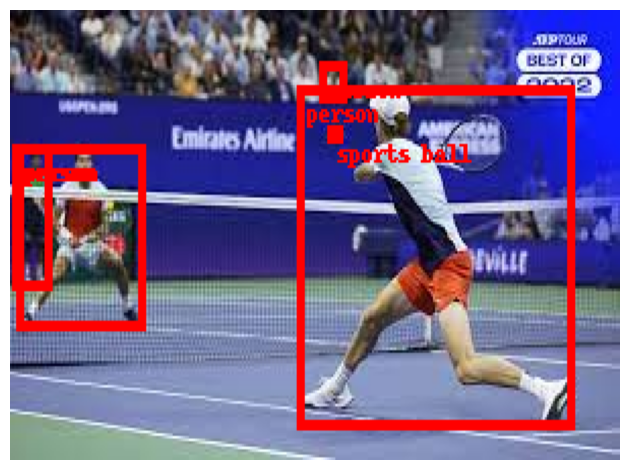

In [33]:
predict_maskrcnn_resnet_model(img_path='/content/tennis.jpeg', show_only_masks=False)

Labels Detected: ['person', 'person', 'sports ball', 'person', 'person']


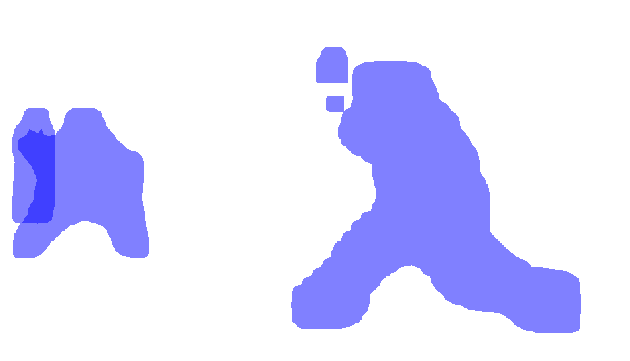

In [34]:
predict_maskrcnn_resnet_model(img_path='/content/tennis.jpeg', show_only_masks=True)

Labels Detected: ['airplane', 'airplane']


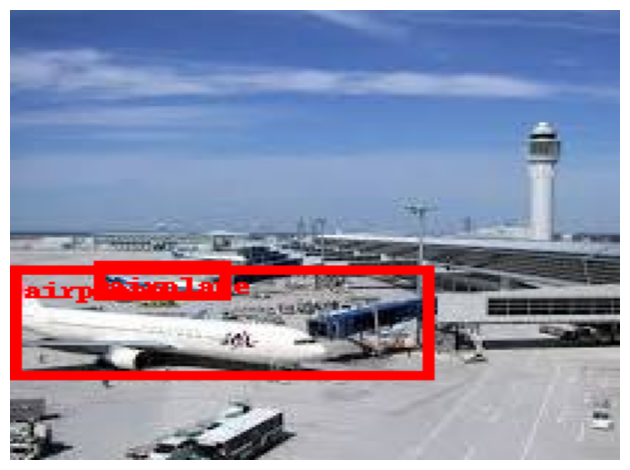

In [35]:
predict_maskrcnn_resnet_model(img_path='/content/airport.jpeg', show_only_masks=False)

Labels Detected: ['airplane', 'airplane']


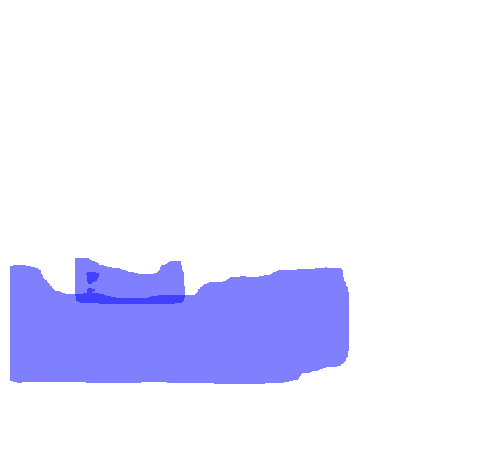

In [36]:
predict_maskrcnn_resnet_model(img_path='/content/airport.jpeg', show_only_masks=True)

Labels Detected: ['stop sign', 'car']


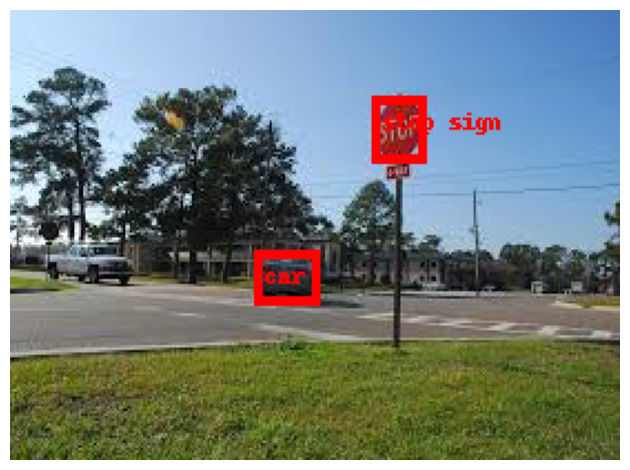

In [37]:
predict_maskrcnn_resnet_model(img_path='/content/stopsign.jpeg', show_only_masks=False)

Labels Detected: ['stop sign', 'car']


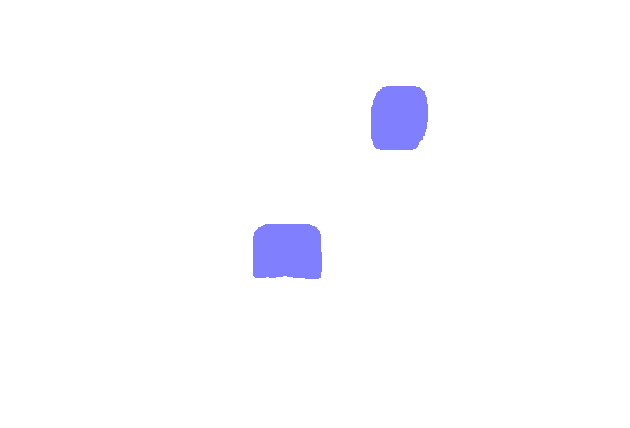

In [38]:
predict_maskrcnn_resnet_model(img_path='/content/stopsign.jpeg', show_only_masks=True)

Labels Detected: ['person', 'pizza', 'bowl', 'car', 'dining table']


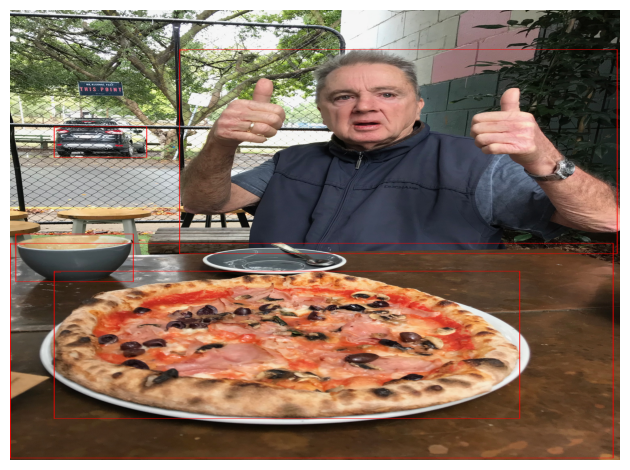

In [39]:
predict_maskrcnn_resnet_model(img_path='/content/04-pizza-dad.jpeg', show_only_masks=False)

Labels Detected: ['person', 'pizza', 'bowl', 'car', 'dining table']


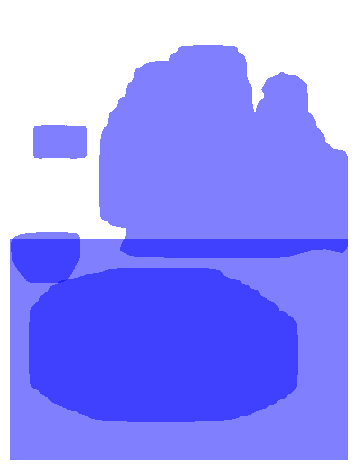

In [40]:
predict_maskrcnn_resnet_model(img_path='/content/04-pizza-dad.jpeg', show_only_masks=True)

### Key Points Detection: KeypointRCNN with ResNet50 backbone FPN model

In [41]:
from torchvision.models.detection import KeypointRCNN_ResNet50_FPN_Weights, keypointrcnn_resnet50_fpn

# Get Best weights from keypoint weights RCNN model and load in Keypoints RCNN model using those weights
keypoint_weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
keypoint_model = keypointrcnn_resnet50_fpn(weights=keypoint_weights, box_score_thresh=0.9).to(device)
keypoint_model

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [42]:
print(f'Region of Interest Pooling Score thresh: {keypoint_model.roi_heads.score_thresh}')

Region of Interest Pooling Score thresh: 0.9


In [47]:
# Build a Function to use Keypoint RCNN model to predict
from PIL import Image
from torchvision.transforms import Compose, ToTensor

def predict_keypoint_rcnn(img_path: str):
  data_transformations = Compose([ToTensor()])
  try:
    img = Image.open(img_path)
  except FileNotFoundError:
    print(f'File Not Found at specific location, pls check image path given')

  transformed_img = data_transformations(img)
  input_tensor = transformed_img.unsqueeze(dim=0).to(device)

  keypoint_model.eval()
  predictions = keypoint_model(input_tensor)[0]
  print(predictions)

  labels = [keypoint_weights.meta["categories"][i] for i in predictions["labels"].cpu().tolist()]
  box_predictions = predictions['boxes'].cpu()

  # Draw Image with bounding boxes
  box = draw_bounding_boxes(read_image(img_path),
                            boxes=box_predictions,
                            labels=labels,
                            colors="red",
                            width=4,
                            font_size=30)

  print(f'Labels Detected: {labels}')
  box = box.permute(1, 2, 0).detach().cpu().numpy()
  plt.imshow(box)

  # Plot keypoints
  keypoint_coordinates = []
  for key in predictions['keypoints'][0]:
    key_x, key_y = key[0].item(), key[1].item()
    keypoint_coordinates.append([key_x, key_y])

  plt.scatter([x for x, y in keypoint_coordinates], [y for x, y in keypoint_coordinates], s=5)




{'boxes': tensor([[ 78.1258,   2.2573, 219.8638, 168.0000]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9955], device='cuda:0', grad_fn=<IndexBackward0>), 'keypoints': tensor([[[153.6069, 110.6882,   1.0000],
         [174.0802,  84.3405,   1.0000],
         [131.3338,  85.2413,   1.0000],
         [202.4278,  93.7986,   1.0000],
         [105.4610,  95.8254,   1.0000],
         [201.9778, 167.4370,   1.0000],
         [ 90.8372, 167.4370,   1.0000],
         [219.5263, 167.4370,   1.0000],
         [192.0786,  23.0877,   1.0000],
         [200.6279, 167.4370,   1.0000],
         [125.4843, 167.4370,   1.0000],
         [190.2788, 147.6199,   1.0000],
         [141.9079, 138.8374,   1.0000],
         [123.9094,  14.7556,   1.0000],
         [124.5844,  14.5304,   1.0000],
         [199.2780, 160.9064,   1.0000],
         [125.9342,  82.7641,   1.0000]]], device='cuda:0',
       grad_fn=<CopySlices>), 'keypoints_scores'

/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


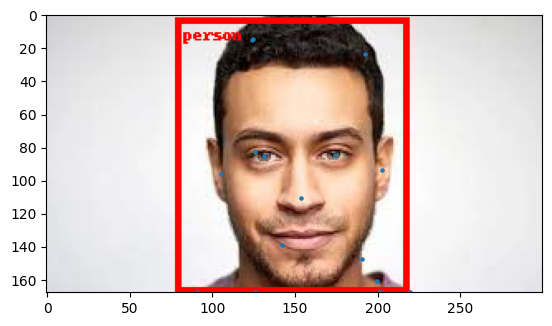

In [48]:
predict_keypoint_rcnn(img_path='/content/face.jpeg')

{'boxes': tensor([[ 49.9797,  33.2575, 101.5469, 165.8627]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9996], device='cuda:0', grad_fn=<IndexBackward0>), 'keypoints': tensor([[[ 82.9508,  49.8618,   1.0000],
         [ 84.3198,  47.3425,   1.0000],
         [ 82.0381,  45.7394,   1.0000],
         [ 75.4211,  43.6781,   1.0000],
         [ 75.6492,  44.3652,   1.0000],
         [ 72.4548,  56.9616,   1.0000],
         [ 66.5223,  56.2745,   1.0000],
         [ 76.5619,  80.5511,   1.0000],
         [ 74.0520,  78.7189,   1.0000],
         [ 88.6551,  88.1089,   1.0000],
         [ 66.2941, 101.8504,   1.0000],
         [ 74.5084, 100.2472,   1.0000],
         [ 66.5223, 101.3923,   1.0000],
         [ 79.3000, 125.4399,   1.0000],
         [ 65.3814, 127.9592,   1.0000],
         [ 86.8297, 153.1519,   1.0000],
         [ 59.4489, 154.7551,   1.0000]]], device='cuda:0',
       grad_fn=<CopySlices>), 'keypoints_scores'

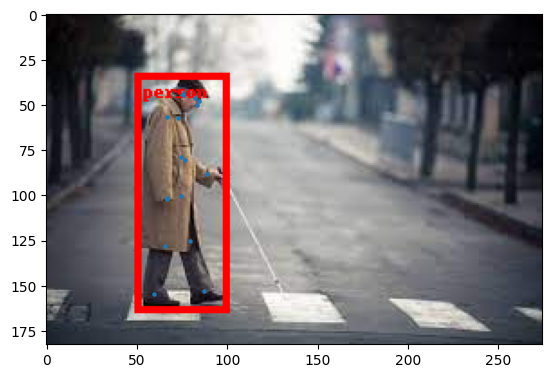

In [49]:
predict_keypoint_rcnn(img_path='/content/man_walking2.jpeg')

{'boxes': tensor([[191.7346,  62.8373, 228.9713, 166.9131],
        [124.1856,  56.8020, 169.0228, 165.2360],
        [ 95.5814,  84.4870, 122.5788, 156.7215],
        [ 20.6693, 114.4695,  40.3426, 148.1888],
        [233.4541,  76.4060, 260.0667, 160.2101],
        [252.6146,  16.9227, 274.0363, 181.4829],
        [  5.5851, 110.1455,  22.3579, 148.3806],
        [161.6118, 105.9519, 177.3071, 143.9460],
        [248.8811,  74.4948, 261.2193,  94.8058]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'), 'scores': tensor([0.9995, 0.9994, 0.9980, 0.9978, 0.9956, 0.9932, 0.9899, 0.9743, 0.9504],
       device='cuda:0', grad_fn=<IndexBackward0>), 'keypoints': tensor([[[220.8615,  74.1598,   1.0000],
         [220.1761,  71.8725,   1.0000],
         [220.1761,  72.1012,   1.0000],
         [208.9823,  73.9311,   1.0000],
         [218.5770,  73.9311,   1.0000],
         [204.1849,  86.5117,   1.0000],
         [222.9175,  86

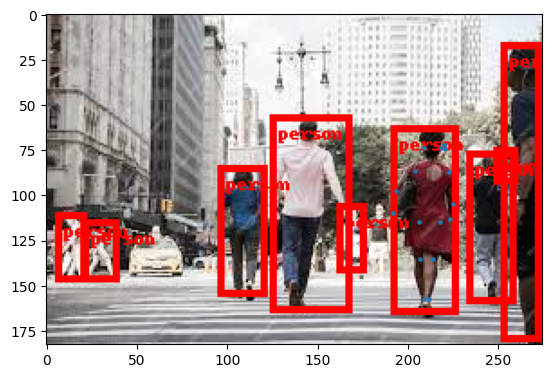

In [50]:
predict_keypoint_rcnn(img_path='/content/men_walking3.jpeg')